<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/main/sign%20language%20using%20CNN/sign_language_using_CNN_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AliARajabi/deep-learning.git

Cloning into 'deep-learning'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 73 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.


In [ ]:
import tensorflow as tf
import h5py
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170500096/170498071 [==============================] - 14s 0us/step


In [ ]:
train_d = h5py.File('/content/deep-learning/sign language using CNN/train_signs.h5','r')
x_train = np.array(train_d["train_set_x"])
y_train = np.array(train_d["train_set_y"])

test_d = h5py.File('/content/deep-learning/sign language using CNN/test_signs.h5','r')
x_test = np.array(test_d["test_set_x"])
y_test = np.array(test_d["test_set_y"])
classes=np.array(train_d["list_classes"])
print(classes)

[0 1 2 3 4 5]


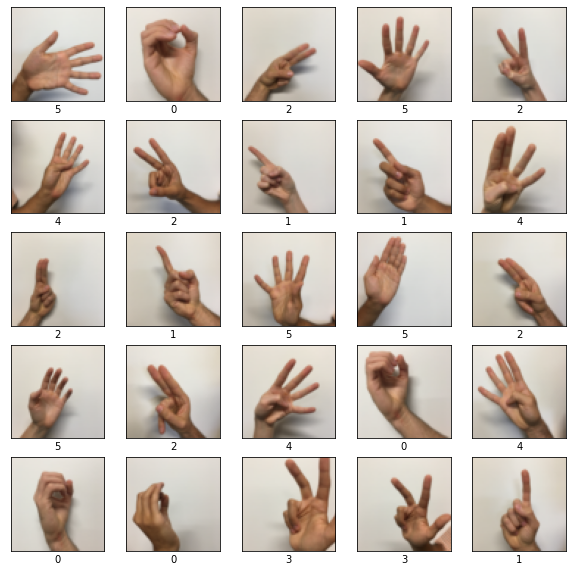

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (4, 4), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((8,8),strides=(8,8), padding='same'))
model.add(layers.Conv2D(16, (2, 2), activation='relu', padding = 'same',strides=(1,1)))
model.add(layers.MaxPooling2D((4,4),strides=(4,4), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation=None))
model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 61, 61, 8)         392       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer=Adam(lr=0.009),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=100, 
                    validation_data=(x_test, y_test))


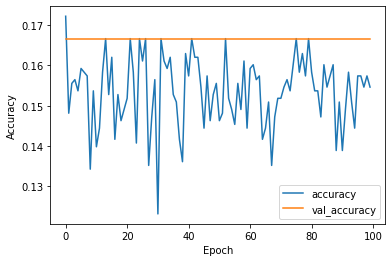

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1),input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(6))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64,epochs=20, 
                    validation_data=(x_test, y_test))


Epoch 1/20
17/17 [==============================] - 6s 316ms/step - loss: 73.0894 - accuracy: 0.1827 - val_loss: 1.7477 - val_accuracy: 0.3167
Epoch 2/20
17/17 [==============================] - 5s 303ms/step - loss: 1.4517 - accuracy: 0.4162 - val_loss: 1.1911 - val_accuracy: 0.5167
Epoch 3/20
17/17 [==============================] - 5s 301ms/step - loss: 0.8975 - accuracy: 0.6590 - val_loss: 1.0114 - val_accuracy: 0.6667
Epoch 4/20
17/17 [==============================] - 5s 302ms/step - loss: 0.5532 - accuracy: 0.8140 - val_loss: 0.7133 - val_accuracy: 0.7333
Epoch 5/20
17/17 [==============================] - 5s 302ms/step - loss: 0.3533 - accuracy: 0.9019 - val_loss: 0.6226 - val_accuracy: 0.7667
Epoch 6/20
17/17 [==============================] - 5s 306ms/step - loss: 0.2411 - accuracy: 0.9285 - val_loss: 0.6891 - val_accuracy: 0.7500
Epoch 7/20
17/17 [==============================] - 5s 304ms/step - loss: 0.1602 - accuracy: 0.9457 - val_loss: 0.6058 - val_accuracy: 0.8167
Epoch

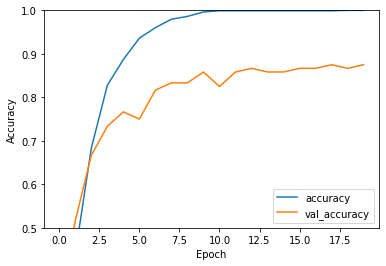

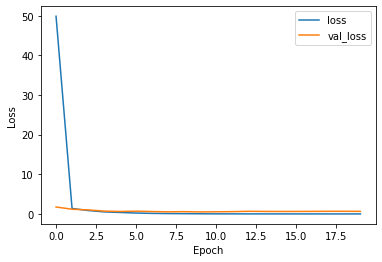

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.figure(0)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

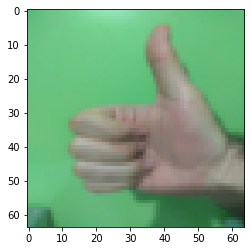

In [62]:
from PIL import Image
import scipy.misc
import imageio
import numpy as np
from skimage.transform import resize
fname = "/content/deep-learning/sign language using CNN/thumbs_up.jpg"
image = np.array(imageio.imread(fname,pilmode='RGB'))
my_image = resize(image, (64, 64))
plt.imshow(my_image)

In [68]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image



In [69]:
 image = load("/content/deep-learning/sign language using CNN/thumbs_up.jpg")
 model.predict(image)


array([[-0.01859599, -0.02431796, -0.0420637 , -0.04511258, -0.06418239,
        -0.03431785]], dtype=float32)